# KNearest Neighbor

KNN algorithm makes predictions by calculating similarity between the input sample and each training instance.

In K-NN algorithm output is a class membership.An object is assigned a class which is most common among its K nearest neighbors,K being the number of neighbors.Intuitively K is always a positive integer


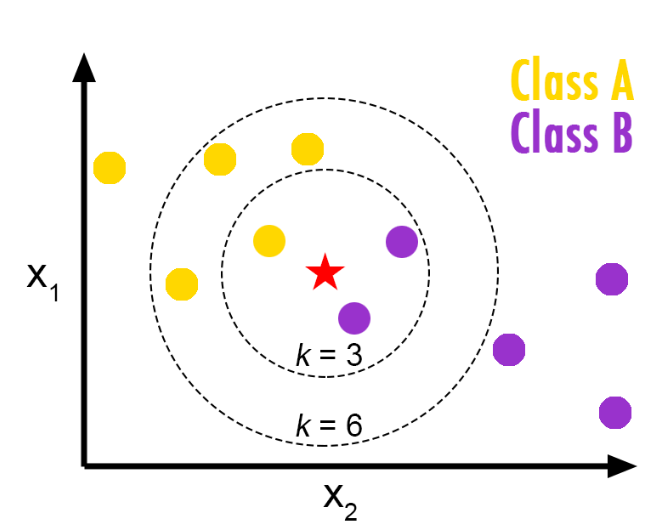

#### Applications of KNN :

If you’re searching for semantically similar documents (i.e., documents containing similar topics), this is referred to as Concept Search.

The biggest use case of K-NN search might be Recommender Systems. If you know a user likes a particular item, then you can recommend similar items for them.

#### Advantages :
No assumptions about data — useful, for example, for nonlinear data
Simple algorithm — to explain and understand/interpret

High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models

Versatile — useful for classification or regression

#### Disadvantages :

Computationally expensive — because the algorithm stores all of the training data

High memory requirement

Prediction stage might be slow (with big N)

Sensitive to irrelevant features and the scale of the data.

### Distance Metric

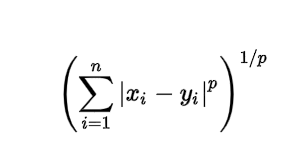

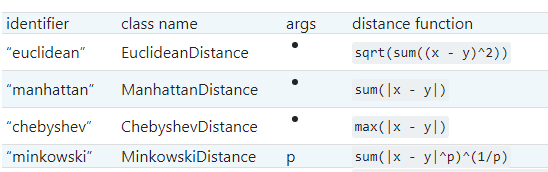

Where,

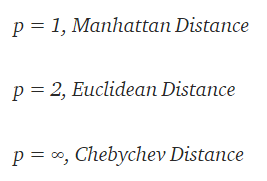

Data Sets:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


     sepal_length  sepal_width  petal_length  petal_width
60            5.0          2.0           3.5          1.0
116           6.5          3.0           5.5          1.8
144           6.7          3.3           5.7          2.5
119           6.0          2.2           5.0          1.5
108           6.7          2.5           5.8          1.8
60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: species, dtype: object
     sepal_length  sepal_width  petal_length  petal_width
114           5.8      

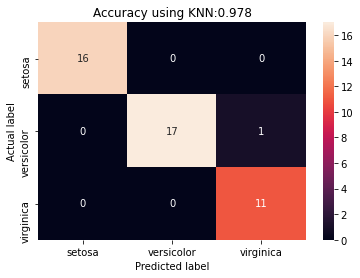



(0.9722222222222222, 0.9814814814814815, 0.975983436853002, None)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Predictions: ['Iris-setosa']


In [65]:
#Import required libraries
#Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#Load the dataset
url = "https://raw.githubusercontent.com/SharmaNatasha/Machine-Learning-using-Python/master/Datasets/IRIS.csv"
df = pd.read_csv(url)

#quick look into the data
print("Data Sets:")
print(df.head(5))
print()
print()

#Separate data and label
x = df.iloc[:,0:4]
y = df.iloc[:,4]
#Prepare data for classification process
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

#Create a model
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski')
print(KNN_Classifier)

#Train the model
KNN_Classifier.fit(x_train, y_train)
#Let's predict the classes for test data
y_pred = KNN_Classifier.predict(x_test)

# Finding accuracy by comparing actual response values(y_test)with predictedresponse value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()
from sklearn.metrics import confusion_matrix
# Finding Confusion Matrix
print(confusion_matrix(y_test, y_pred))

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred),index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using KNN:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print()
print()
# Finding precision_recall_fscore
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

# Providing sample data and the model will make prediction out of that data
print()
print()
print(classification_report(y_test, y_pred))

preds = KNN_Classifier.predict([[4.7,3.2,1.3,1.2]])

print("Predictions:",preds)



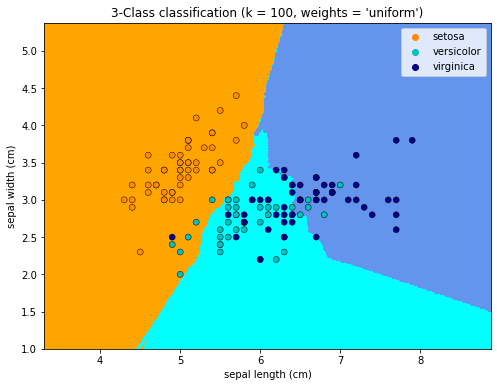

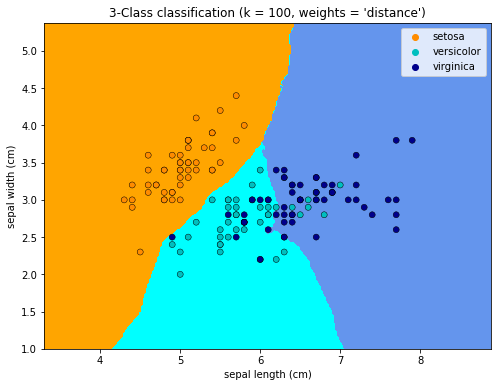

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 100

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()